In [1]:

import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0,
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5,
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5,
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0,
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0,
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [3]:

from sklearn.model_selection import train_test_split

# 훈련 세트와 테스트 세트로 나눕니다
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)
# 훈련 세트와 테스트 세트를 2차원 배열로 바꿉니다
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [5]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=3)
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor(n_neighbors=3)

## 선형 회귀

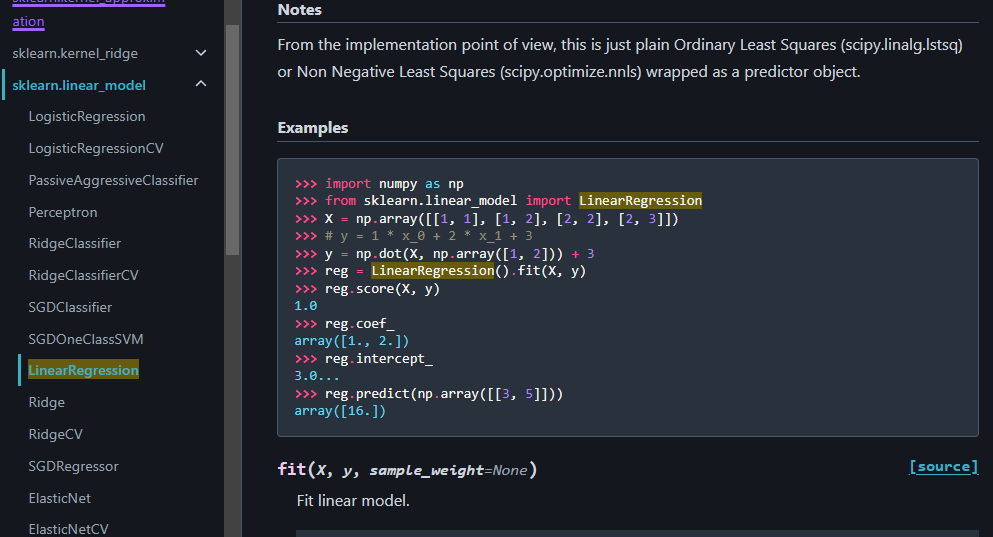

In [6]:

from sklearn.linear_model import LinearRegression

In [7]:

lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [9]:
lr.score(train_input, train_target)

0.9398463339976041

In [10]:
lr.score(test_input, test_target)

0.824750312331356

In [13]:
np.corrcoef(perch_length, perch_weight)

array([[1.        , 0.95865587],
       [0.95865587, 1.        ]])

In [15]:
# 상관계수
lr.coef_

array([39.01714496])

In [17]:
lr.intercept_

-709.0186449535474

In [21]:
import matplotlib.pyplot as plt


In [ ]:
# y_hat = lr.coef_ * x + lr.intercept_ * 

In [22]:
lr.coef_ * 50 + lr.intercept_

array([1241.83860323])

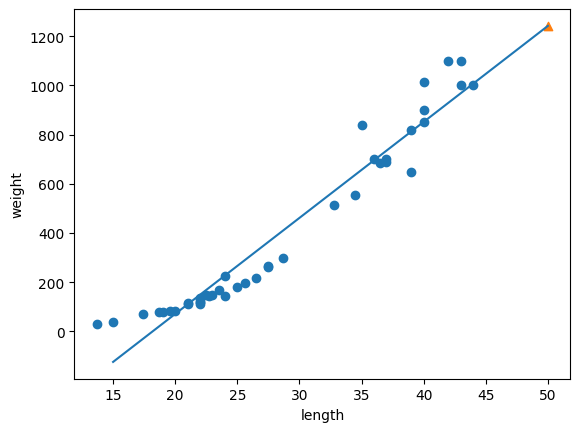

In [25]:
plt.scatter(train_input, train_target)
plt.plot([15,50],[lr.coef_ *15 + lr.intercept_, lr.coef_ * 50 + lr.intercept_])
plt.scatter(50, 1241.83860323, marker="^")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [26]:
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.9398463339976041
0.824750312331356


## 다항회귀 

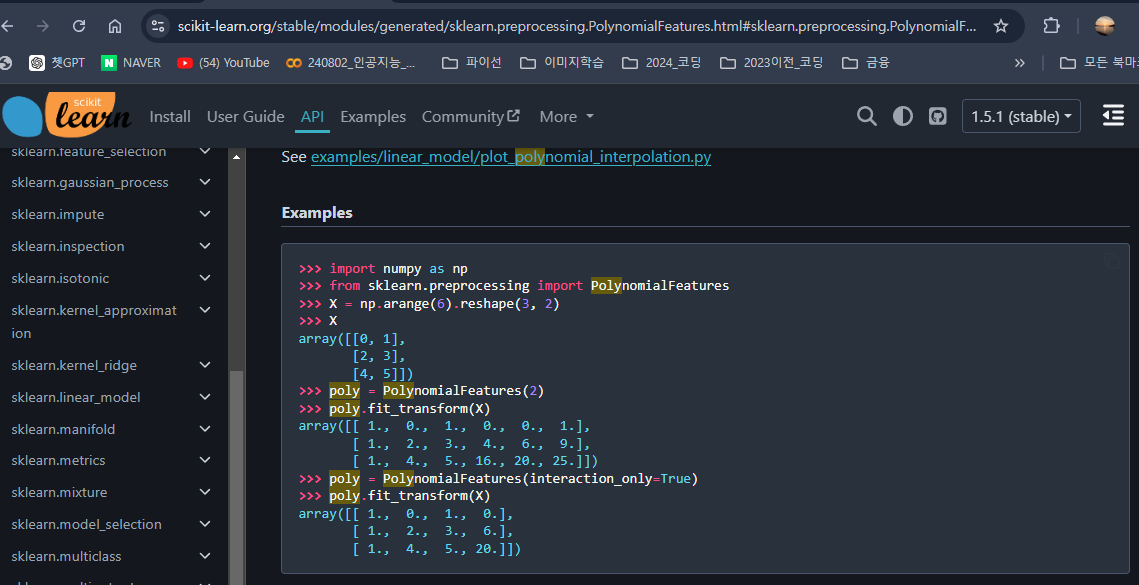

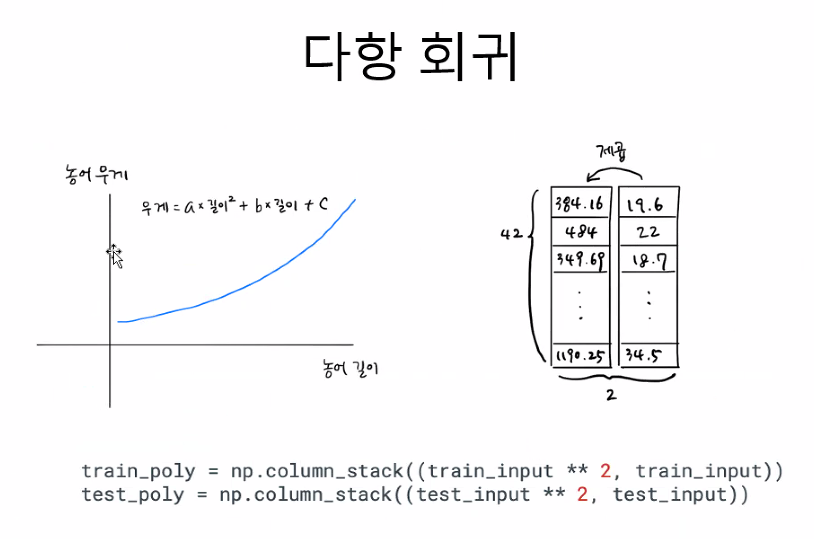

In [28]:
import numpy as np

# 0.824750312331356 수치가 좀 낮아서 다항회귀 사용으로 올린다.
train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))

In [29]:
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [31]:
lr = LinearRegression()
# 선형 회귀 모델 훈련
lr.fit(train_input, train_target)

LinearRegression()

In [32]:
# 단순 선형(직선)
#   훈련데이터 모델 평가 
#       : 0.9398463339976041
#   테스트 모델 평가
#       : 0.824750312331356

In [37]:

print(train_poly.shape, train_target.shape)
print(test_poly.shape, test_target.shape)

(42, 2) (42,)
(14, 2) (14,)


In [39]:

lr = LinearRegression()
lr.fit(train_poly, train_target)


print(lr.predict([[50**2, 50]]))

[1573.98423528]


In [41]:
lr.score(train_poly, train_target)

0.9706807451768623

In [42]:
lr.score(test_poly, test_target)

0.9775935108325122

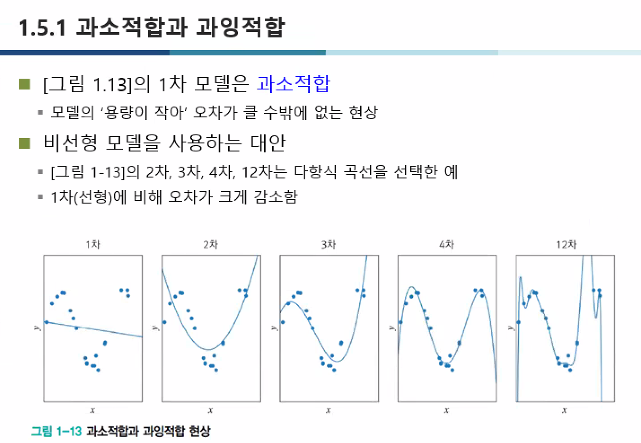

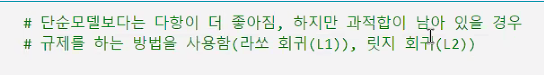

In [43]:
print(lr.coef_, lr.intercept_)

[  1.01433211 -21.55792498] 116.05021078278264


In [ ]:
# 계수 lr.coef_ 결과가 2개로 나옴. [  1.01433211 -21.55792498]
# y= ax^2 + ax + b
# y_hat = 1.01433211 * x^2 + (-21.55792498) * x + 116.05021078278264

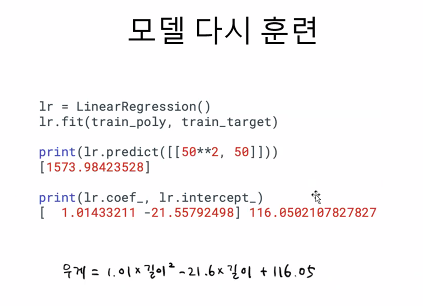

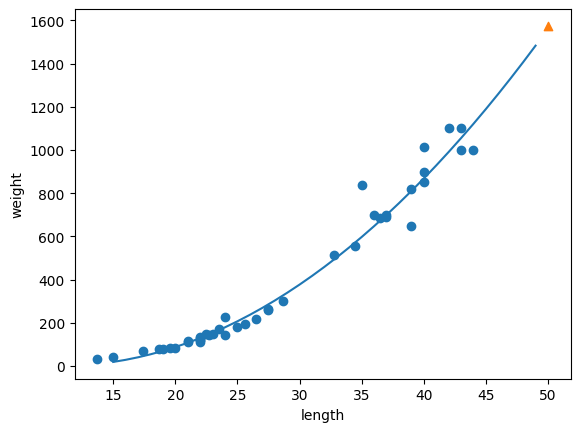

In [45]:

# 구간별 직선을 그리기 위해 15에서 49까지 정수 배열을 만듭니다
point = np.arange(15, 50)
# 훈련 세트의 산점도를 그립니다
plt.scatter(train_input, train_target)
# 15에서 49까지 2차 방정식 그래프를 그립니다
plt.plot(point, 1.01*point**2 - 21.6*point + 116.05)
# 50cm 농어 데이터
plt.scatter([50], [1574], marker='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [46]:

print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [47]:
# L1 라쏘 lasso = 올가미 형태
# L2 릿지 ridge = 능선

## 다중 회귀

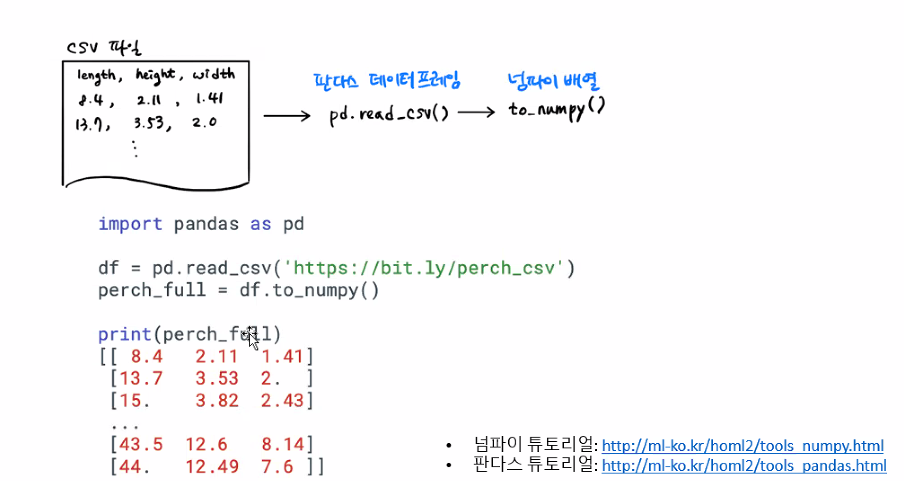

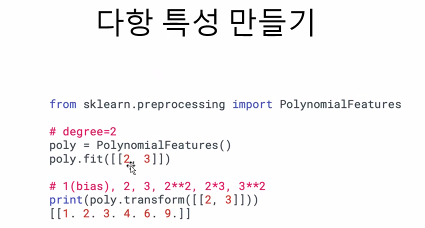

In [59]:

import pandas as pd



In [60]:
df = pd.read_csv('https://bit.ly/perch_csv_data')
perch_full = df.to_numpy()
print(perch_full)

[[ 8.4   2.11  1.41]
 [13.7   3.53  2.  ]
 [15.    3.82  2.43]
 [16.2   4.59  2.63]
 [17.4   4.59  2.94]
 [18.    5.22  3.32]
 [18.7   5.2   3.12]
 [19.    5.64  3.05]
 [19.6   5.14  3.04]
 [20.    5.08  2.77]
 [21.    5.69  3.56]
 [21.    5.92  3.31]
 [21.    5.69  3.67]
 [21.3   6.38  3.53]
 [22.    6.11  3.41]
 [22.    5.64  3.52]
 [22.    6.11  3.52]
 [22.    5.88  3.52]
 [22.    5.52  4.  ]
 [22.5   5.86  3.62]
 [22.5   6.79  3.62]
 [22.7   5.95  3.63]
 [23.    5.22  3.63]
 [23.5   6.28  3.72]
 [24.    7.29  3.72]
 [24.    6.38  3.82]
 [24.6   6.73  4.17]
 [25.    6.44  3.68]
 [25.6   6.56  4.24]
 [26.5   7.17  4.14]
 [27.3   8.32  5.14]
 [27.5   7.17  4.34]
 [27.5   7.05  4.34]
 [27.5   7.28  4.57]
 [28.    7.82  4.2 ]
 [28.7   7.59  4.64]
 [30.    7.62  4.77]
 [32.8  10.03  6.02]
 [34.5  10.26  6.39]
 [35.   11.49  7.8 ]
 [36.5  10.88  6.86]
 [36.   10.61  6.74]
 [37.   10.84  6.26]
 [37.   10.57  6.37]
 [39.   11.14  7.49]
 [39.   11.14  6.  ]
 [39.   12.43  7.35]
 [40.   11.93

In [61]:

import numpy as np

perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0,
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0,
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0,
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0,
     1000.0, 1000.0]
     )

In [62]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)


In [51]:
from sklearn.preprocessing import PolynomialFeatures

# degree = 2
poly = PolynomialFeatures() #include_bias=True
poly.fit([[2,3]])

# 1(bias), 2, 3, 2**2, 2**3, 3**2
print(poly.transform([[2,3]]))

[[1. 2. 3. 4. 6. 9.]]


In [63]:
# feature engineering : 기존의 특성을 가지고
# 새로운 특성을 만들어냄
# bias를 뺄 수도 있다. 기본은 True
poly_norminal = PolynomialFeatures(include_bias=False)
poly_norminal.fit([[2, 3]])
print(poly_norminal.transform([[2, 3]]))

[[2. 3. 4. 6. 9.]]


In [64]:
poly_norminal.get_feature_names_out()

array(['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2'], dtype=object)

In [65]:
len(poly_norminal.get_feature_names_out())

5

In [66]:
poly_norminal_re = PolynomialFeatures(include_bias=False)
poly_norminal_re.fit([[2, 3, 5]])
print(poly_norminal_re.transform([[2, 3, 5]]))

[[ 2.  3.  5.  4.  6. 10.  9. 15. 25.]]


In [67]:
poly_norminal_re.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [68]:
len(poly_norminal_re.get_feature_names_out())

9

In [69]:
poly_norminal_re = PolynomialFeatures(include_bias=True)
poly_norminal_re.fit([[2, 3, 5]])
print(poly_norminal_re.transform([[2, 3, 5]]))
print(poly_norminal_re.get_feature_names_out())
print(len(poly_norminal_re.get_feature_names_out()))

[[ 1.  2.  3.  5.  4.  6. 10.  9. 15. 25.]]
['1' 'x0' 'x1' 'x2' 'x0^2' 'x0 x1' 'x0 x2' 'x1^2' 'x1 x2' 'x2^2']
10


In [54]:
 
poly = PolynomialFeatures(include_bias=False)

poly.fit(train_input)
train_poly = poly.transform(train_input)

In [55]:

print(train_poly.shape)

(42, 2)


In [56]:

poly.get_feature_names_out()

array(['x0', 'x0^2'], dtype=object)

In [57]:
test_poly = poly.transform(test_input)

In [58]:
test_poly

array([[   8.4 ,   70.56],
       [  18.  ,  324.  ],
       [  27.5 ,  756.25],
       [  21.3 ,  453.69],
       [  22.5 ,  506.25],
       [  40.  , 1600.  ],
       [  30.  ,  900.  ],
       [  24.6 ,  605.16],
       [  39.  , 1521.  ],
       [  21.  ,  441.  ],
       [  43.5 , 1892.25],
       [  16.2 ,  262.44],
       [  28.  ,  784.  ],
       [  27.3 ,  745.29]])

In [81]:
poly_norminal2 = PolynomialFeatures(include_bias=False)
poly_norminal2.fit(train_input)
train_poly2 = poly_norminal2.transform(train_input)
print(poly_norminal2.transform([[2, 3, 5]]))

[[ 2.  3.  5.  4.  6. 10.  9. 15. 25.]]


In [80]:
train_poly2.shape

(42, 9)

In [83]:
poly_norminal2.get_feature_names_out()

array(['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2',
       'x2^2'], dtype=object)

In [85]:
train_poly2

array([[  19.6   ,    5.14  ,    3.04  ,  384.16  ,  100.744 ,   59.584 ,
          26.4196,   15.6256,    9.2416],
       [  22.    ,    5.88  ,    3.52  ,  484.    ,  129.36  ,   77.44  ,
          34.5744,   20.6976,   12.3904],
       [  18.7   ,    5.2   ,    3.12  ,  349.69  ,   97.24  ,   58.344 ,
          27.04  ,   16.224 ,    9.7344],
       [  17.4   ,    4.59  ,    2.94  ,  302.76  ,   79.866 ,   51.156 ,
          21.0681,   13.4946,    8.6436],
       [  36.    ,   10.61  ,    6.74  , 1296.    ,  381.96  ,  242.64  ,
         112.5721,   71.5114,   45.4276],
       [  25.    ,    6.44  ,    3.68  ,  625.    ,  161.    ,   92.    ,
          41.4736,   23.6992,   13.5424],
       [  40.    ,   11.93  ,    7.11  , 1600.    ,  477.2   ,  284.4   ,
         142.3249,   84.8223,   50.5521],
       [  39.    ,   12.43  ,    7.35  , 1521.    ,  484.77  ,  286.65  ,
         154.5049,   91.3605,   54.0225],
       [  43.    ,   11.93  ,    7.28  , 1849.    ,  512.99  ,  313.04  

In [84]:
train_poly2[0]

array([ 19.6   ,   5.14  ,   3.04  , 384.16  , 100.744 ,  59.584 ,
        26.4196,  15.6256,   9.2416])